## **Bài 1:**

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(0)

In [71]:
def load_data_from_file(file_name="Module_4\\Week_2\\advertising.csv"):
    data = np.genfromtxt(
        file_name,
        delimiter=",",
        skip_header=1,
        dtype=None
    )
    features_X = data[:, :3]
    sales_y = data[:, 3]
    
    intercept = np.ones((sales_y.shape[0], 1))
    features_X = np.concatenate([intercept, features_X], axis=1)
    
    return features_X, sales_y

In [74]:
# Cau 2: A
features_X, sales_y = load_data_from_file()
print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [75]:
# Cau 3: B
sales_y.shape

(200,)

## **Bài 2:**

In [76]:
def create_individual(n=4, bound=10):
    individual = bound * np.random.random_sample(n) - bound // 2
    
    return individual

In [83]:
individual = create_individual()
print(individual)

[-3.81725574  1.39921021 -3.56646713  4.44668917]


## **Bài 3:**

In [34]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat - sales_y), (y_hat - sales_y)).mean()
    
    return loss


def compute_fitness(individual):
    loss = compute_loss(individual=individual)
    fitness_value = 1 / (loss + 1)
    
    return fitness_value    

In [35]:
# Cau 4: C
features_X, sales_y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


## **Bài 4:**

In [84]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(len(individual1)):
        if np.random.rand() < crossover_rate:
            individual1[i], individual2[i] = individual2[i], individual1[i]
    
    return individual1_new, individual2_new

In [85]:
# Cau 5: D
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(
    individual1=individual1,
    individual2=individual2,   
    crossover_rate=2.0 
)

print("individual1:", individual1)
print("individual2:", individual2)

individual1: [4.09, 4.82, 3.1, 4.02]
individual2: [3.44, 2.57, -0.79, -2.41]


## **Bài 5:**

In [94]:
def mutate(individual, mutation_rate=0.05, bound=10, n=4):
    individual_m = individual.copy()
    
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual_m[i] = bound * np.random.random_sample(1) - bound / 2
    
    return individual_m

In [95]:
# Cau 6: A
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(before_individual, mutation_rate=2.0)
print(before_individual == after_individual)

False


## **Bài 6:**

In [96]:
def initialize_population(population_size):
    population = [create_individual() for _ in range(population_size)]
    
    return population

## **Bài 7:**

In [97]:
def selection(sorted_old_population, m=100):
    index1 = np.random.randint(0, m - 1)
    
    while True:
        index2 = np.random.randint(0, m - 1)
        if index2 != index1:
            break
            
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
        
    return individual_s

## **Bài 8:**

In [99]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)
    
    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[m - 1]), 
              "with chromosome:", sorted_population[m - 1]
        )
    
    new_population = []
    
    while len(new_population) < m - elitism:
        # selection
        individual_s1 = selection(sorted_population, m=m)
        individual_s2 = selection(sorted_population, m=m)
        
        # crossover
        individual_s1, individual_s2 = crossover(individual_s1, individual_s2)
        
        # mutation
        individual_s1 = mutate(individual_s1)
        individual_s2 = mutate(individual_s2)
        
        new_population.append(individual_s1)
        new_population.append(individual_s2)
        
    # copy elitism chromosome
    for item in sorted_population[m - elitism:]: 
        new_population.append(item.copy())
        
    return new_population, compute_loss(sorted_population[m - 1])

In [100]:
# Cau 7: A
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]

new_population, _ = create_new_population(old_population=old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromosome: [3.44, 2.57, -0.79, -2.41]


## **Bài 9:**

In [110]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_y = load_data_from_file()
    population = initialize_population(m)
    losses = []
    
    for i in range(n_generations):
        population, loss = create_new_population(old_population=population, elitism=2, gen=i)
        losses.append(loss)
    
    return population, losses

## **Bài 10:**

In [111]:
def visualize_loss(losses):
    n_generations = list(range(100))
    plt.plot(n_generations, losses, color="r")
    plt.xlabel("Generations")
    plt.ylabel("losses")

Best loss: 885.3202779648485 with chromosome: [-3.96760985 -0.11004033  0.58762485  1.01141664]
Best loss: 245.01476778580232 with chromosome: [ 0.10711481  0.08810237 -0.45071834  0.64330511]
Best loss: 245.01476778580232 with chromosome: [ 0.10711481  0.08810237 -0.45071834  0.64330511]
Best loss: 245.01476778580232 with chromosome: [ 0.10711481  0.08810237 -0.45071834  0.64330511]
Best loss: 245.01476778580232 with chromosome: [ 0.10711481  0.08810237 -0.45071834  0.64330511]
Best loss: 184.43848266429075 with chromosome: [ 2.99251322 -0.06303791  0.40313437  0.31582225]
Best loss: 184.43848266429075 with chromosome: [ 2.99251322 -0.06303791  0.40313437  0.31582225]
Best loss: 54.21968880683422 with chromosome: [-2.27563878  0.06268917  0.60907127 -0.19231688]
Best loss: 54.21968880683422 with chromosome: [-2.27563878  0.06268917  0.60907127 -0.19231688]
Best loss: 54.21968880683422 with chromosome: [-2.27563878  0.06268917  0.60907127 -0.19231688]


C:\Users\Computer\AppData\Local\Temp\ipykernel_13932\2116802978.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  individual_m[i] = bound * np.random.random_sample(1) - bound / 2


Best loss: 23.139391257648967 with chromosome: [-3.96760985  0.07230261  0.39579238 -0.01553277]
Best loss: 23.139391257648967 with chromosome: [-3.96760985  0.07230261  0.39579238 -0.01553277]
Best loss: 23.139391257648967 with chromosome: [-3.96760985  0.07230261  0.39579238 -0.01553277]
Best loss: 23.139391257648967 with chromosome: [-3.96760985  0.07230261  0.39579238 -0.01553277]
Best loss: 23.139391257648967 with chromosome: [-3.96760985  0.07230261  0.39579238 -0.01553277]
Best loss: 23.139391257648967 with chromosome: [-3.96760985  0.07230261  0.39579238 -0.01553277]
Best loss: 23.139391257648967 with chromosome: [-3.96760985  0.07230261  0.39579238 -0.01553277]
Best loss: 23.139391257648967 with chromosome: [-3.96760985  0.07230261  0.39579238 -0.01553277]
Best loss: 23.139391257648967 with chromosome: [-3.96760985  0.07230261  0.39579238 -0.01553277]
Best loss: 23.139391257648967 with chromosome: [-3.96760985  0.07230261  0.39579238 -0.01553277]
Best loss: 23.139391257648967 

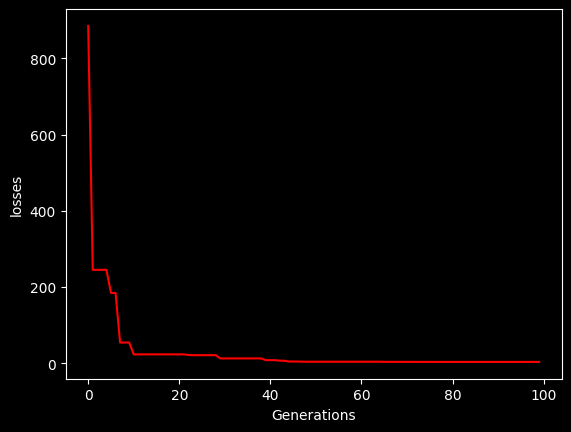

In [112]:
population, losses = run_GA()
visualize_loss(losses)

## **Bài 10:**

[ 3.7511143   0.06268917  0.11443939 -0.01652161]


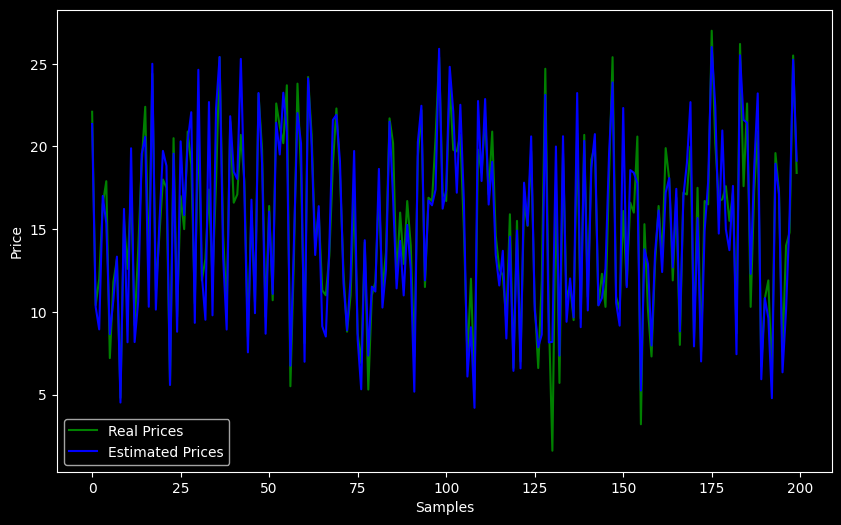

In [113]:
def visualize_predict_gt(sales_y, population):
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
      estimated_price = sum(c*x for x, c in zip(feature, theta))
      estimated_prices.append(estimated_price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt(sales_y, population=population)